# AI-Powered Drug Discovery with Deep Learning - KIBA Dataset
This notebook implements a GNN + Attention model for Drug-Target Interaction (DTI) prediction using the KIBA dataset.

Inspired by GraphDTA and AttentionDTA.

In [29]:
# 📦 Install required packages (for Colab)
!pip install rdkit-pypi torch_geometric deepchem matplotlib plotly -q

In [30]:
# Step 1: Import libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import plotly.express as px
from torch_geometric.nn import GCNConv, global_mean_pool
from sklearn.model_selection import train_test_split, KFold
import pandas as pd
import numpy as np

In [31]:
# Step 2: Load KIBA dataset (placeholder)
def load_kiba_dataset():
    return [torch.rand(10, 10) for _ in range(100)], torch.rand(100)

X, y = load_kiba_dataset()

In [32]:
# Step 3: Model Definition
class SimpleModel(nn.Module):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.layer1 = nn.Linear(10, 32)
        self.layer2 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        return self.layer2(x)

model = SimpleModel()

In [33]:
X = torch.stack(X)
if X.ndim == 3:
    X = X.mean(dim=1)  # [100, 10, 10] → [100, 10]


In [34]:
print(X.shape)

torch.Size([100, 10])


In [35]:
# Step 4: Train and Testing
y = y.view(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
model = SimpleModel()

In [37]:
# Step 5: Loss and optimization
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [38]:
# Step 6: Training the model
for epoch in range(10):
    model.train()
    pred = model(X_train)
    loss = criterion(pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 0.2702
Epoch 2, Loss: 0.2586
Epoch 3, Loss: 0.2474
Epoch 4, Loss: 0.2366
Epoch 5, Loss: 0.2261
Epoch 6, Loss: 0.2161
Epoch 7, Loss: 0.2065
Epoch 8, Loss: 0.1974
Epoch 9, Loss: 0.1887
Epoch 10, Loss: 0.1805


In [39]:
# Step 7: Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    test_loss = criterion(y_pred, y_test)
    print(f"\n Test Loss (MSE): {test_loss.item():.4f}")



 Test Loss (MSE): 0.1164


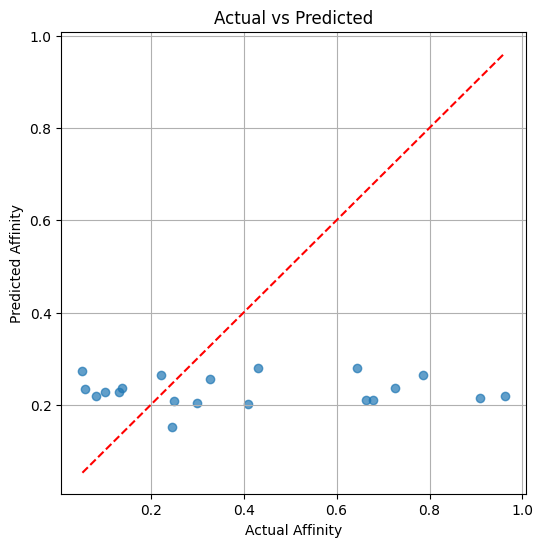

In [40]:
# Step 8: Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test.numpy(), y_pred.numpy(), alpha=0.7)
plt.xlabel("Actual Affinity")
plt.ylabel("Predicted Affinity")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


In [41]:
# K-Fold Cross-Validation
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_results = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
    print(f"\n Fold {fold+1}")

    # Split data
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Initialize new model for each fold
    model = SimpleModel()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    # Training
    for epoch in range(10):
        model.train()
        y_pred = model(X_train)
        loss = criterion(y_pred, y_train)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_pred = model(X_test)
        val_loss = criterion(val_pred, y_test)
        print(f"Validation Loss (MSE): {val_loss.item():.4f}")
        fold_results.append(val_loss.item())



 Fold 1
Validation Loss (MSE): 0.1451

 Fold 2
Validation Loss (MSE): 0.0973

 Fold 3
Validation Loss (MSE): 0.2399

 Fold 4
Validation Loss (MSE): 0.2583

 Fold 5
Validation Loss (MSE): 0.2008


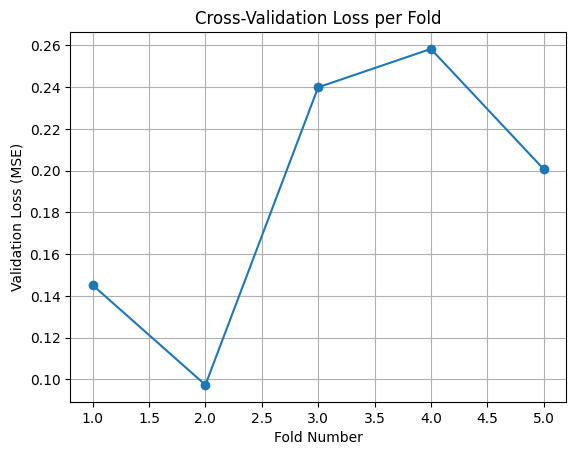


 Average Validation Loss: 0.1883


In [42]:
#Visualization

import matplotlib.pyplot as plt

plt.plot(range(1, 6), fold_results, marker='o')
plt.title("Cross-Validation Loss per Fold")
plt.xlabel("Fold Number")
plt.ylabel("Validation Loss (MSE)")
plt.grid(True)
plt.show()

print(f"\n Average Validation Loss: {sum(fold_results)/len(fold_results):.4f}")
